In [0]:
import numpy as np
import matplotlib.pyplot as plt
import imgaug as ia
import cv2 as cv

%matplotlib inline

np.random.seed(1)

In [1]:
!tar -xvf ../qr_codes.tar.gz
!rm -rf images/
!mv qr_codes/* ./
!rm -r qr_codes/

qr_codes/
qr_codes/fips_valid.csv
qr_codes/images/
qr_codes/images/5327274374.jpg
qr_codes/images/5014378360.jpg
qr_codes/images/2126492335.jpg
qr_codes/images/4872978369.jpg
qr_codes/images/4821931054.jpg
qr_codes/images/4946341553.jpg
qr_codes/images/2332977452.jpg
qr_codes/images/3210084213.jpg
qr_codes/images/4917222006.jpg
qr_codes/images/3359230395.jpg
qr_codes/images/4905458230.jpg
qr_codes/images/5236047029.jpg
qr_codes/images/5208855909.jpg
qr_codes/images/4340207281.jpg
qr_codes/images/3027815370.jpg
qr_codes/images/5326665675.jpg
qr_codes/images/4807729131.jpg
qr_codes/images/5117983633.jpg
qr_codes/images/2078613193.jpg
qr_codes/images/2237317748.jpg
qr_codes/images/3643877605.jpg
qr_codes/images/3303278929.jpg
qr_codes/images/4787848106.jpg
qr_codes/images/5121116199.jpg
qr_codes/images/4649988496.jpg
qr_codes/images/3594871243.jpg
qr_codes/images/3360044712.jpg
qr_codes/images/4994326352.jpg
qr_codes/images/3976044005.jpg
qr_codes/images/4941942874.jpg
qr_codes/images/325

qr_codes/images/2870381761.jpg
qr_codes/images/3362030142.jpg
qr_codes/images/2236526027.jpg
qr_codes/images/5137889651.jpg
qr_codes/images/4859558749.jpg
qr_codes/images/4956470281.jpg
qr_codes/images/3430305612.jpg
qr_codes/images/4219788005.jpg
qr_codes/images/2644241344.jpg
qr_codes/images/4123610847.jpg
qr_codes/images/2237232238.jpg
qr_codes/images/4195660045.jpg
qr_codes/images/4992344523.jpg
qr_codes/images/4848390238.jpg
qr_codes/images/3950055651.jpg
qr_codes/images/2708471549.jpg
qr_codes/images/2943752525.jpg
qr_codes/images/3482714875.jpg
qr_codes/images/1840578464.jpg
qr_codes/images/3346833848.jpg
qr_codes/images/2124747258.jpg
qr_codes/images/4952260665.jpg
qr_codes/images/4387464054.jpg
qr_codes/images/4884107014.jpg
qr_codes/images/4864169133.jpg
qr_codes/images/4440799716.jpg
qr_codes/images/4064425091.jpg
qr_codes/images/2985146218.jpg
qr_codes/images/4933142246.jpg
qr_codes/images/2237238420.jpg
qr_codes/images/2194489491.jpg
qr_codes/images/3897888195.jpg
qr_codes

qr_codes/images/4071142993.jpg
qr_codes/images/5148588549.jpg
qr_codes/images/3413058024.jpg
qr_codes/images/3875393950.jpg
qr_codes/images/2595337516.jpg
qr_codes/images/5053297805.jpg
qr_codes/images/3360046942.jpg
qr_codes/images/4437534340.jpg
qr_codes/images/4059157596.jpg
qr_codes/images/5108412472.jpg
qr_codes/images/5164857092.jpg
qr_codes/images/4353977850.jpg
qr_codes/images/4391955186.jpg
qr_codes/images/4886984392.jpg
qr_codes/images/3891459413.jpg
qr_codes/images/4952852960.jpg
qr_codes/images/2236468419.jpg
qr_codes/images/5100495935.jpg
qr_codes/images/2595337520.jpg
qr_codes/images/2869227993.jpg
qr_codes/images/5085559548.jpg
qr_codes/images/3352436654.jpg
qr_codes/images/5055321464.jpg
qr_codes/images/0525173503.jpg
qr_codes/images/5149194708.jpg
qr_codes/images/2954565832.jpg
qr_codes/images/4864066718.jpg
qr_codes/images/4370993698.jpg
qr_codes/images/5241281672.jpg
qr_codes/images/4880150149.jpg
qr_codes/images/1439079783.jpg
qr_codes/images/5030691999.jpg
qr_codes

In [0]:
from ppn_keras.networks.subparts_ssd_ppn_mobilenet import SubParts_SSD_PPN_MobileNet

network = SubParts_SSD_PPN_MobileNet(class_labels = ['qr_code'],
                                     subparts_class_labels = ['fip'],
                                     input_shape = (480,480,3))

network.model.summary()

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 480, 480, 3)  0                                            
__________________________________________________________________________________________________
preprocess (Lambda)             (None, 480, 480, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 481, 481, 3)  0           preprocess[0][0]                 
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 240, 240, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (

In [0]:
from imgaug import augmenters as iaa
import numpy as np

# Sometimes(0.5, ...) applies the given augmenter in 50% of all cases,
# e.g. Sometimes(0.5, GaussianBlur(0.3)) would blur roughly every second
# image.
sometimes = lambda aug: iaa.Sometimes(0.5, aug)

# Define our sequence of augmentation steps that will be applied to every image.
augmentation_seq = iaa.Sequential(
    [
        #
        # Apply the following augmenters to most images.
        #
        iaa.Fliplr(0.5), # horizontally flip 50% of all images
        iaa.Flipud(0.2), # vertically flip 20% of all images

        # crop some of the images by 0-10% of their height/width
        sometimes(iaa.Crop(percent=(0, 0.1))),

        # Apply affine transformations to some of the images
        # - scale to 80-120% of image height/width (each axis independently)
        # - translate by -20 to +20 relative to height/width (per axis)
        # - rotate by -45 to +45 degrees
        # - shear by -16 to +16 degrees
        # - order: use nearest neighbour or bilinear interpolation (fast)
        # - mode: use any available mode to fill newly created pixels
        #         see API or scikit-image for which modes are available
        # - cval: if the mode is constant, then use a random brightness
        #         for the newly created pixels (e.g. sometimes black,
        #         sometimes white)
        sometimes(iaa.Affine(
            scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
            translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
            rotate=(-45, 45),
            shear=(-16, 16),
            order=[0, 1],
            cval=(0, 255),
            mode=ia.ALL
        )),

        #
        # Execute 0 to 5 of the following (less important) augmenters per
        # image. Don't execute all of them, as that would often be way too
        # strong.
        #
        iaa.SomeOf((0, 5),
            [
                # Convert some images into their superpixel representation,
                # sample between 20 and 200 superpixels per image, but do
                # not replace all superpixels with their average, only
                # some of them (p_replace).
                sometimes(
                    iaa.Superpixels(
                        p_replace=(0, 1.0),
                        n_segments=(20, 200)
                    )
                ),

                # Blur each image with varying strength using
                # gaussian blur (sigma between 0 and 3.0),
                # average/uniform blur (kernel size between 2x2 and 7x7)
                # median blur (kernel size between 3x3 and 11x11).
                iaa.OneOf([
                    iaa.GaussianBlur((0, 3.0)),
                    iaa.AverageBlur(k=(2, 7)),
                    iaa.MedianBlur(k=(3, 11)),
                ]),

                # Sharpen each image, overlay the result with the original
                # image using an alpha between 0 (no sharpening) and 1
                # (full sharpening effect).
                iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)),

                # Same as sharpen, but for an embossing effect.
                iaa.Emboss(alpha=(0, 1.0), strength=(0, 2.0)),

                # Search in some images either for all edges or for
                # directed edges. These edges are then marked in a black
                # and white image and overlayed with the original image
                # using an alpha of 0 to 0.7.
                sometimes(iaa.OneOf([
                    iaa.EdgeDetect(alpha=(0, 0.7)),
                    iaa.DirectedEdgeDetect(
                        alpha=(0, 0.7), direction=(0.0, 1.0)
                    ),
                ])),

                # Add gaussian noise to some images.
                # In 50% of these cases, the noise is randomly sampled per
                # channel and pixel.
                # In the other 50% of all cases it is sampled once per
                # pixel (i.e. brightness change).
                iaa.AdditiveGaussianNoise(
                    loc=0, scale=(0.0, 0.05*255), per_channel=0.5
                ),

                # Either drop randomly 1 to 10% of all pixels (i.e. set
                # them to black) or drop them on an image with 2-5% percent
                # of the original size, leading to large dropped
                # rectangles.
                iaa.OneOf([
                    iaa.Dropout((0.01, 0.1), per_channel=0.5),
                    iaa.CoarseDropout(
                        (0.03, 0.15), size_percent=(0.02, 0.05),
                        per_channel=0.2
                    ),
                ]),

                # Invert each image's chanell with 5% probability.
                # This sets each pixel value v to 255-v.
                iaa.Invert(0.05, per_channel=True), # invert color channels

                # Add a value of -10 to 10 to each pixel.
                iaa.Add((-10, 10), per_channel=0.5),

                # Change brightness of images (50-150% of original value).
                iaa.Multiply((0.5, 1.5), per_channel=0.5),

                # Improve or worsen the contrast of images.
                iaa.ContrastNormalization((0.5, 2.0), per_channel=0.5),

                # Convert each image to grayscale and then overlay the
                # result with the original with random alpha. I.e. remove
                # colors with varying strengths.
                iaa.Grayscale(alpha=(0.0, 1.0)),

                # In some images move pixels locally around (with random
                # strengths).
                sometimes(
                    iaa.ElasticTransformation(alpha=(0.5, 3.5), sigma=0.25)
                ),

                # In some images distort local areas with varying strength.
                sometimes(iaa.PiecewiseAffine(scale=(0.01, 0.05)))
            ],
            # do all of the above augmentations in random order
            random_order=True
        )
    ],
    # do all of the above augmentations in random order
    random_order=True
)

Preprocessing Dataset: 100%|██████████| 143/143 [00:05<00:00, 24.67it/s]


567 training images
100 validation images
(8, 480, 480, 3)
(8, 7260, 6) (8, 7260, 6)
[[BoundingBoxesOnImage([BoundingBox(x1=195.6757, y1=459.7271, x2=217.5430, y2=476.3680, label=fip)], shape=(480, 480, 3))], [BoundingBoxesOnImage([BoundingBox(x1=195.6757, y1=458.9346, x2=260.5405, y2=480.0000, label=qr_code)], shape=(480, 480, 3))]]


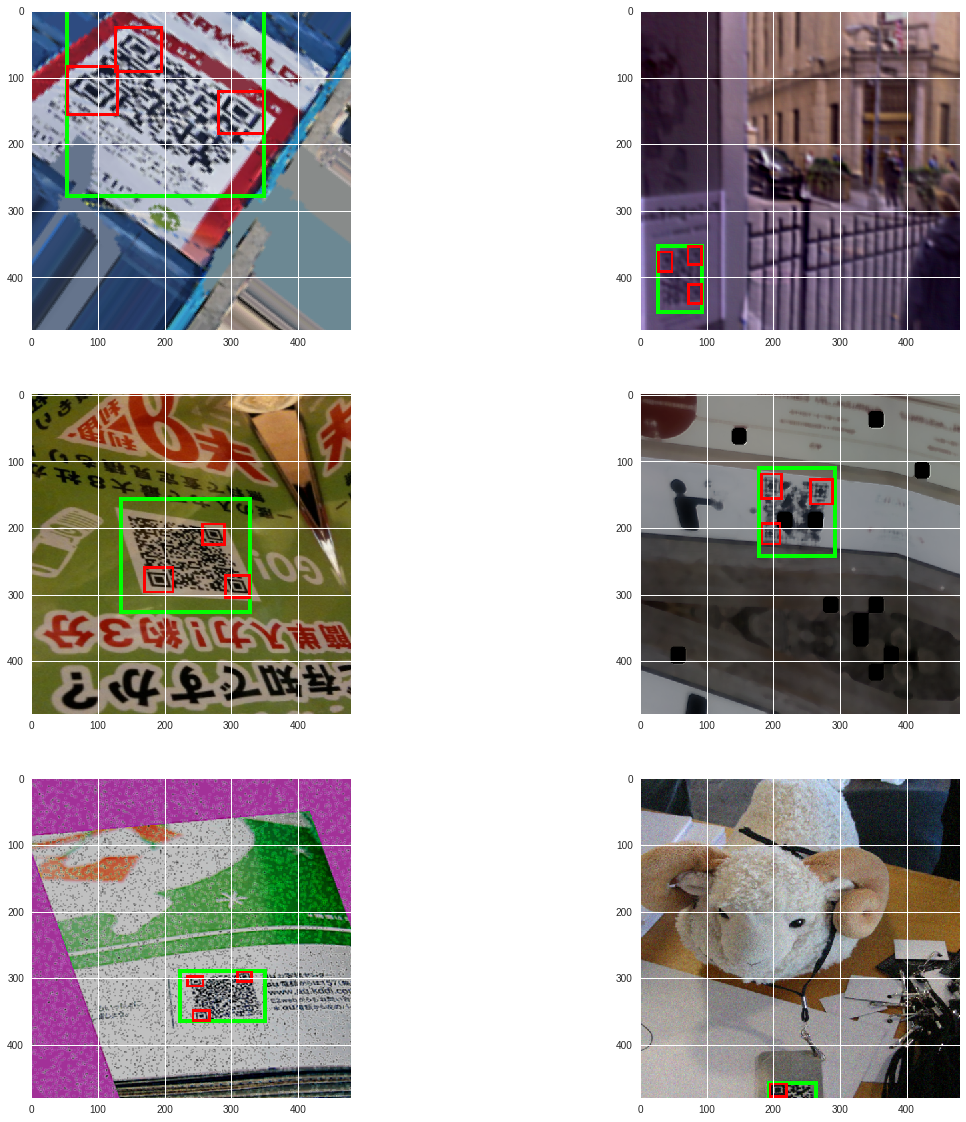

In [0]:
import pandas as pd

train_qr_codes = pd.read_csv('qr_codes_train.csv', dtype={'image_id': str, 'object_id': str})
valid_qr_codes = pd.read_csv('qr_codes_valid.csv', dtype={'image_id': str, 'object_id': str})

train_fips = pd.read_csv('fips_train.csv', dtype={'image_id': str, 'object_id': str})
valid_fips = pd.read_csv('fips_valid.csv', dtype={'image_id': str, 'object_id': str})

from ppn_keras.subparts_batch_generator import SubPartsBatchGenerator

batch_generator_train = SubPartsBatchGenerator(network)
batch_generator_valid = SubPartsBatchGenerator(network)

batch_generator_train.add_data(dataset = train_qr_codes, subparts_dataset = train_fips, images_dir='images')
batch_generator_valid.add_data(dataset = valid_qr_codes, subparts_dataset = valid_fips, images_dir='images')

batch_size = 8

valid_generator, valid_size = batch_generator_valid.get_generator(batch_size = 1, shuffle = False, augmentation = False, encode_output = False)
valid_X, valid_y_subparts, valid_y_obj = [], [], []

for _ in range(valid_size):
  batch_X, batch_y = next(valid_generator)
  valid_X.append(batch_X[0])
  valid_y_subparts.append(batch_y[0][0])
  valid_y_obj.append(batch_y[1][0])
  
valid_X = np.array(valid_X)

train_generator, train_size = batch_generator_train.get_generator(batch_size=batch_size, shuffle=True, augmentation=augmentation_seq, encode_output=True)
valid_generator, valid_size = batch_generator_valid.get_generator(batch_size = batch_size, shuffle = False, augmentation = False, encode_output = True)

print('%d training images' % train_size)
print('%d validation images' % valid_size)

train_generator_vis, _ = batch_generator_train.get_generator(batch_size=1, shuffle=True, augmentation=augmentation_seq, encode_output=False)

batch_X, batch_y = next(train_generator)
print(batch_X.shape)
print(batch_y[0].shape, batch_y[1].shape)

fig = plt.figure(figsize=(20,20))

for i in range(6):
  batch_X, batch_y = next(train_generator_vis)
  img = batch_X[0]
  subpart_boxes, obj_boxes = batch_y[0][0], batch_y[1][0]
  
  img = obj_boxes.draw_on_image(img, thickness=6)
  img = subpart_boxes.draw_on_image(img, thickness=4, color=[255,0,0])
  
  ax = fig.add_subplot(3, 2, i+1)
  ax.imshow(img)
  
print(batch_y)

In [0]:
import keras
from ppn_keras import metrics

network.model.compile(
  optimizer = keras.optimizers.Adam(1e-4, decay=1e-4),
  loss = {'subparts_output': metrics.get_ppn_loss(), 'main_output': metrics.get_ppn_loss()},
  loss_weights = {'subparts_output': 1.0, 'main_output': 2.0}
)

In [0]:
from keras.callbacks import Callback, ModelCheckpoint
from ppn_keras.encode_decode_output import output_decoder
from ppn_keras.encode_decode_subparts_output import subparts_output_decoder

class PrintMetricsOnEnd(Callback):
  def __init__(self):
    super(PrintMetricsOnEnd, self).__init__()
    
  def on_epoch_end(self, epoch, logs=None):
    logs = logs or {}
    for k in self.params['metrics']:
      if k in logs:
        print('%s: %.10f' % (k, logs[k]))
    print()
    
class EvaluateValidMeanAP(Callback):
  def __init__(self):
    super(EvaluateValidMeanAP, self).__init__()
    self.best_mAP = 0
    
  def on_epoch_end(self, epoch, logs=None):
    y_pred = network.model.predict(valid_X, batch_size = batch_size, verbose = 0)
    y_pred = [
        subparts_output_decoder(y_pred[0], network, nms_threshold = 0.3),
        output_decoder(y_pred[1], network, nms_threshold = 0.3)
    ]
    
    APs = [
        metrics.AP(valid_y_subparts, y_pred[0]),
        metrics.AP(valid_y_obj, y_pred[1])
    ]
    
    print('Validation APs:', APs)
    print()
    
    if APs[1] > self.best_mAP:
      self.best_mAP = APs[1]
      network.model.save('subparts_ppn_mobilenet_qr_codes_fips.%03d-%.6f_mAP.hdf5' % (epoch, APs[1]))

!rm subparts_ppn_mobilenet_qr_codes_fips.*

network.model.fit_generator(train_generator,
                            steps_per_epoch = 50,
                            epochs = 100,
                            validation_data = valid_generator,
                            validation_steps = int(np.floor(valid_size / batch_size)),
                            verbose = 1,
                            max_queue_size = 200,
                            callbacks = [
                                PrintMetricsOnEnd(),
                                EvaluateValidMeanAP()
                            ])  
  

rm: cannot remove 'subparts_ppn_mobilenet_qr_codes_fips.*': No such file or directory
Epoch 1/100
50/50 [==============================] - 238s 5s/step - loss: 0.0757 - subparts_output_loss: 0.0211 - main_output_loss: 0.0273 - val_loss: 0.0191 - val_subparts_output_loss: 0.0068 - val_main_output_loss: 0.0061
loss: 0.0756808540
subparts_output_loss: 0.0210570069
main_output_loss: 0.0273119231
val_loss: 0.0190682557
val_subparts_output_loss: 0.0067874588
val_main_output_loss: 0.0061403984

Validation APs: [0.0, 0.011747350252857263]

Epoch 2/100
50/50 [==============================] - 85s 2s/step - loss: 0.0194 - subparts_output_loss: 0.0068 - main_output_loss: 0.0063 - val_loss: 0.0118 - val_subparts_output_loss: 0.0047 - val_main_output_loss: 0.0036
loss: 0.0194348472
subparts_output_loss: 0.0068093236
main_output_loss: 0.0063127618
val_loss: 0.0118190275
val_subparts_output_loss: 0.0046670386
val_main_output_loss: 0.0035759945

Validation APs: [3.1345997116168264e-05, 0.0129385696456

In [0]:
!ls -l

total 1617108
-rw-r--r-- 1 root root    19652 Jan 25 12:08 fips_test.csv
-rw-r--r-- 1 root root   124866 Jan 25 12:08 fips_train.csv
-rw-r--r-- 1 root root    18679 Jan 25 12:08 fips_valid.csv
drwxr-xr-x 2 root root    36864 Jan 25 12:08 images
drwx------ 8 root root     4096 Jan 25 12:08 ppn_keras
-rw-r--r-- 1 root root 24910896 Jan 25 09:26 ppn_mobilenet_qr_codes.000-0.015183_mAP.hdf5
-rw-r--r-- 1 root root 24910896 Jan 25 09:26 ppn_mobilenet_qr_codes.001-0.029929_mAP.hdf5
-rw-r--r-- 1 root root 24910896 Jan 25 09:27 ppn_mobilenet_qr_codes.002-0.059546_mAP.hdf5
-rw-r--r-- 1 root root 24910896 Jan 25 09:28 ppn_mobilenet_qr_codes.003-0.111528_mAP.hdf5
-rw-r--r-- 1 root root 24910896 Jan 25 09:30 ppn_mobilenet_qr_codes.005-0.146337_mAP.hdf5
-rw-r--r-- 1 root root 24910896 Jan 25 09:32 ppn_mobilenet_qr_codes.007-0.155766_mAP.hdf5
-rw-r--r-- 1 root root 24910896 Jan 25 09:33 ppn_mobilenet_qr_codes.008-0.202119_mAP.hdf5
-rw-r--r-- 1 root root 24910896 Jan 25 09:39 ppn_mobilenet_qr_codes.01

In [0]:
from ppn_keras.encode_decode_output import output_decoder
from ppn_keras.encode_decode_subparts_output import subparts_output_decoder
from google.colab import files

from glob import glob
model_path = sorted(glob('subparts_ppn_mobilenet_qr_codes_fips.*'))[-1]
print(model_path)

import keras
from keras.utils.generic_utils import CustomObjectScope

with CustomObjectScope({'mobilenet': keras.applications.mobilenet,
                        'relu6': keras.layers.ReLU(6.),
                        'ppn_loss': metrics.get_ppn_loss()}):
    model = keras.models.load_model(model_path)

#model = network.model

y_pred = model.predict(valid_X, batch_size = batch_size)
y_pred = [
    subparts_output_decoder(y_pred[0], network, nms_threshold = 0.3),
    output_decoder(y_pred[1], network, nms_threshold = 0.3)
]

APs = [
    metrics.AP(valid_y_subparts, y_pred[0]),
    metrics.AP(valid_y_obj, y_pred[1])
]

print('Validation APs:', APs)

for i in range(valid_size):
  img, subpart_boxes, obj_boxes = valid_X[i], y_pred[0][i], y_pred[1][i]

  img = obj_boxes.draw_on_image(img, thickness=6)
  img = subpart_boxes.draw_on_image(img, thickness=4, color=[255,0,0])
  
  cv.imwrite('qr_code_fip_valid_%d.png'%i, img[..., [2,1,0]])
  
!rm qr_code_fip_valid_subparts_mobilenet.tar.gz valid_results/*
!mkdir valid_results
!mv qr_code_fip_valid* valid_results
!tar -cvf qr_code_fip_valid_subparts_mobilenet.tar.gz valid_results

subparts_ppn_mobilenet_qr_codes_fips.097-0.734102_mAP.hdf5
Validation APs: [0.13246246040563842, 0.73410160603043]
rm: cannot remove 'qr_code_fip_valid_subparts_mobilenet.tar.gz': No such file or directory
mkdir: cannot create directory ‘valid_results’: File exists
valid_results/
valid_results/qr_code_fip_valid_29.png
valid_results/qr_code_fip_valid_96.png
valid_results/qr_code_fip_valid_14.png
valid_results/qr_code_fip_valid_99.png
valid_results/qr_code_fip_valid_36.png
valid_results/qr_code_fip_valid_76.png
valid_results/qr_code_fip_valid_3.png
valid_results/qr_code_fip_valid_37.png
valid_results/qr_code_fip_valid_9.png
valid_results/qr_code_fip_valid_86.png
valid_results/qr_code_fip_valid_88.png
valid_results/qr_code_fip_valid_55.png
valid_results/qr_code_fip_valid_10.png
valid_results/qr_code_fip_valid_40.png
valid_results/qr_code_fip_valid_34.png
valid_results/qr_code_fip_valid_39.png
valid_results/qr_code_fip_valid_64.png
valid_results/qr_code_fip_valid_63.png
valid_results/qr_co

In [0]:
test_qr_codes = pd.read_csv('qr_codes_test.csv', dtype={'image_id': str, 'object_id': str})
test_fips = pd.read_csv('fips_test.csv', dtype={'image_id': str, 'object_id': str})

batch_generator_test = SubPartsBatchGenerator(network)
batch_generator_test.add_data(dataset = test_qr_codes, subparts_dataset = test_fips, images_dir='images')

test_generator, test_size = batch_generator_test.get_generator(batch_size = 1, shuffle = False, augmentation = False, encode_output = False)
test_X, test_y_subparts, test_y_obj = [], [], []

for _ in range(test_size):
  batch_X, batch_y = next(test_generator)
  test_X.append(batch_X[0])
  test_y_subparts.append(batch_y[0][0])
  test_y_obj.append(batch_y[1][0])
  
test_X = np.array(test_X)


from ppn_keras.encode_decode_output import output_decoder
from ppn_keras.encode_decode_subparts_output import subparts_output_decoder
from google.colab import files

from glob import glob
model_path = sorted(glob('subparts_ppn_mobilenet_qr_codes_fips.*'))[-1]
print(model_path)

import keras
from keras.utils.generic_utils import CustomObjectScope

with CustomObjectScope({'mobilenet': keras.applications.mobilenet,
                        'relu6': keras.layers.ReLU(6.),
                        'ppn_loss': metrics.get_ppn_loss()}):
    model = keras.models.load_model(model_path)

#model = network.model

y_pred = model.predict(test_X, batch_size = batch_size)
y_pred = [
    subparts_output_decoder(y_pred[0], network, nms_threshold = 0.3),
    output_decoder(y_pred[1], network, nms_threshold = 0.3)
]

APs = [
    metrics.AP(test_y_subparts, y_pred[0]),
    metrics.AP(test_y_obj, y_pred[1])
]

print('Test APs:', APs)

for i in range(test_size):
  img, subpart_boxes, obj_boxes = valid_X[i], y_pred[0][i], y_pred[1][i]

  img = obj_boxes.draw_on_image(img, thickness=6)
  img = subpart_boxes.draw_on_image(img, thickness=4, color=[255,0,0])
  
  cv.imwrite('qr_code_fip_test_%d.png'%i, img[..., [2,1,0]])
  
!rm qr_code_test_subparts_mobilenet.tar.gz test_results/*
!mkdir test_results
!mv qr_code_fip_test* test_results
!tar -cvf qr_code_test_subparts_mobilenet.tar.gz test_results

Preprocessing Dataset: 100%|██████████| 158/158 [00:05<00:00, 30.42it/s]


subparts_ppn_mobilenet_qr_codes_fips.097-0.734102_mAP.hdf5
Test APs: [0.1478308016732474, 0.716950329123151]
rm: cannot remove 'qr_code_test_subparts_mobilenet.tar.gz': No such file or directory
mkdir: cannot create directory ‘test_results’: File exists
test_results/
test_results/qr_code_fip_test_67.png
test_results/qr_code_fip_test_3.png
test_results/qr_code_fip_test_12.png
test_results/qr_code_fip_test_44.png
test_results/qr_code_fip_test_84.png
test_results/qr_code_fip_test_13.png
test_results/qr_code_fip_test_39.png
test_results/qr_code_fip_test_24.png
test_results/qr_code_fip_test_54.png
test_results/qr_code_fip_test_96.png
test_results/qr_code_fip_test_94.png
test_results/qr_code_fip_test_86.png
test_results/qr_code_fip_test_98.png
test_results/qr_code_fip_test_79.png
test_results/qr_code_fip_test_9.png
test_results/qr_code_fip_test_15.png
test_results/qr_code_fip_test_83.png
test_results/qr_code_fip_test_93.png
test_results/qr_code_fip_test_37.png
test_results/qr_code_fip_test_3